 # Scraping Top Repositories for topics on github
 
 TODO:
 1. Introduction to web Scraping:> Web scraping (or data scraping) is a technique used to collect content and data from the internet. This data is usually saved in a local file so that it can be manipulated and analyzed as needed. If you’ve ever copied and pasted content from a website into an Excel spreadsheet, this is essentially what web scraping is, but on a very small scale.However, when people refer to ‘web scrapers,’ they’re usually talking about software applications. Web scraping applications (or ‘bots’) are programmed to visit websites, grab the relevant pages and extract useful information. By automating this process, these bots can extract huge amounts of data in a very short time. This has obvious benefits in the digital age, when big data—which is constantly updating and changing—plays such a prominent role.
 2. Introduction to Github:> GitHub is an increasingly popular programming resource used for code sharing. It's a social networking site for programmers that many companies and organizations use to facilitate project management and collaboration. According to statistics collected in October 2020, it is the most prominent source code host, with over 60 million new repositories created in 2020 and boasting over 56 million total developers.
 3. Tools:> Python, requests, Pandas,Jupyter Notebook.
 
 Project Summary:
- We're going to scrape https://github.com/topics
- We will get list of topics. For each topic we get topic title, topic page URL and topic description
- For each topic, we will get the top 25 repositries in the topic from the topic page
- For each repo, we will grap the repo name, username, stars and repo URL
- For each topic we'll create a CSV file in the following 


    format:
    Repo Name,Username,Stars,Repo URL
    three.js,mrdoob,69700,https://github.com/mrdoob/three.js
    libgdx,libgdx,18300,https://github.com/libgdx/libgdx 

## Scrape the list of topics from GIthub
The steps will be followed:
- use requests to download the page
- use BS4 to parse and extract information
- convert to a pandas dataframe

#### Lets write a function to download the page

In [21]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:

def get_topics_page():
    # Start Downloading the page
    topic_url = 'https://github.com/topics'
    response = requests.get(topic_url)
    # Check  the successful response
    if(response.status_code != 200):
        raise Exception('Failed to load page {}'.format(topic_url))
        
    # Parse the document using beautiful soup
    doc = BeautifulSoup(response.text, 'html.parser')
    return doc

In [5]:
doc  = get_topics_page()

Let's create some helper functions to parse information from the page.

To get topic titles, we can pick p tags with the class ...
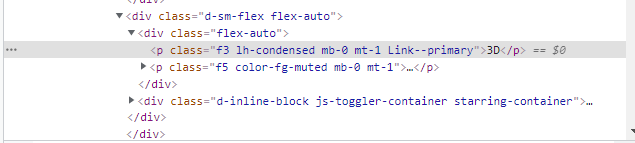

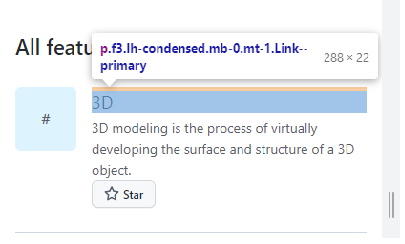

In [6]:
def get_topic_titles(doc):
    selection_class = 'f3 lh-condensed mb-0 mt-1 Link--primary'
    topic_title_tags = doc.find_all('p', {'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles

- we use <b>get_topic_title</b> function to get the list of titles

In [7]:
titles = get_topic_titles(doc)

In [8]:
len(titles)

30

In [9]:
titles[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

- we use <b>get_topic_desc</b> function to get the descriptions

In [10]:
def get_topic_descs(doc):
    desc_selector = 'f5 color-fg-muted mb-0 mt-1'
    topic_desc_tags = doc.find_all('p',{'class':desc_selector})
    topic_descs = []
    for tag in topic_desc_tags:
        topic_descs.append(tag.text.strip())
    return topic_descs

- we use <b>get_topic_urls</b> function to get the urls of each topic

In [11]:
def get_topic_urls(doc):
    topic_link_tags = doc.find_all('a',{'class':'d-flex no-underline'})
    topic_urls = []
    base_url = 'https://github.com'
    
    for tag in topic_link_tags:
        topic_urls.append(base_url + tag['href'])
    return topic_urls

- Lets scrape the whole thing using a single functions

In [12]:
def scrape_topics():
    topics_url = 'https://github.com/topics' 
    response = requests.get(topics_url)
    if response.status_code != 200:
        raise Exceptional("Failed to load page {}".format(topic_url))
    topics_dict = {
        'title':get_topic_titles(doc),
        'description':get_topic_descs(doc),
        'url':get_topic_urls(doc)
    }
    return pd.DataFrame(topics_dict)

## Get the top 25 repositories in the topic from the topic page

In [13]:
def get_topics_page(topic_url):
    # Start Downloading the page
    response = requests.get(topic_url)
    
    # Check  the successful response
    if(response.status_code != 200):
        raise Exception('Failed to load page {}'.format(topic_url))
        
    # Parse the document using beautiful soup
    topic_doc = BeautifulSoup(response.text, 'html.parser')
    return topic_doc

In [15]:
doc = get_topics_page('https://github.com/topics/3d')

In [16]:
def get_repo_info(h3_tag,star_tag):
        # it will return all the required infor about a reposiory
        a_tags = h3_tag.find_all('a')
        username = a_tags[0].text.strip()
        repo_name = a_tags[1].text.strip()
        repo_url = base_url + a_tags[1]['href']
        stars = parse_star_count(star_tag.text.strip())
        return username,repo_name,stars,repo_url

In [17]:
def get_topic_repos(topic_doc):
    
    # Get the h3 tags containing repo-title, repo-url, and username
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    
    repo_tags = topic_doc.find_all('h3',{'class': h3_selection_class}) 
    
    # get the info of star tag
    star_tags =topic_doc.find_all('a',{'class':'social-count float-none'})
    
    topic_repos_dict = {
        'username' : [],
        'repo_name': [],
        'stars':[],
        'repo_url':[]
    }

    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i],star_tags[i])
        topic_repos_dict['username'].append(repo_info[0])
        topic_repos_dict['repo_name'].append(repo_info[1])
        topic_repos_dict['stars'].append(repo_info[2])
        topic_repos_dict['repo_url'].append(repo_info[3])
    return pd.DataFrame(topic_repos_dict)

In [18]:
def scrape_topic(topic_url,topic_name):
    fname = topic_name + '.csv'
    if os.path.exists(fname):
        print("The file{} already exists. Skipping------".format(fname))
        return
    
    topic_df = get_topic_repos(get_topics_page(topic_url))
    topic_df.to_csv(fname,index = None)

### Putting it all together
- We create a function to get the list og topics
- We have a function to create a CSV file for scraped repos from a topics page
- Let's create a function to put them together

In [22]:
def scrape_topics_repos():
    print('Scraping list of topics')
    topics_df = scrape_topics()
    for index, row in topics_df.iterrows():
        print('Scraping top repositories for"{}"'.format(row['title']))
        scrape_topic(row['url'],row['title'])

## Lets run it to scrape the top repos for all the topics on the the first page of https://github.com/topics

In [23]:
scrape_topics_repos()

Scraping list of topics


# References  and Future work


Ideas for future work
- We create an interactive UI Web application for the fresh undergraduates to be a part of the open source community.
- We can enhance this work for research purposes


Bibliography
- https://jupyter.org/documentation
- https://pandas.pydata.org/
- https://github.com/
